<a href="https://colab.research.google.com/github/rayjinghaolei/Mask_Detection/blob/main/Mask_detection_YoloV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 14691 (delta 1), reused 4 (delta 0), pack-reused 14677
Receiving objects: 100% (14691/14691), 13.27 MiB | 24.22 MiB/s, done.
Resolving deltas: 100% (9987/9987), done.


In [ ]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-01-24 18:16:41--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   462KB/s    in 8m 58s  

2021-01-24 18:25:40 (450 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
def imShow(path):
    import cv2
    import matplotlib.pyplot as plt
    %matplotlib inline

    image = cv2.imread(path)
    height,width = image.shape[:2]
    resized_image = cv2.resize(image, (3*width, 3*height),interpolation = cv2.INTER_CUBIC)

    fig = plt.gcf()
    fig.set_size_inches(18,10)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(resized_image,cv2.COLOR_BGR2RGB))
    plt.show()

In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

AttributeError: ignored

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'190 group activity 2.gdoc'
 222lab
'240 lab'
'2A course resources.gdoc'
'2A Jinghao (Ray) Lei - Resume.pdf'
 79159200299-1141454953-ticket.gdoc
 79159200299-1141454953-ticket.pdf
'after start.gdoc'
'AK textbook.pdf'
'Android app development'
'AWS bash file.gdoc'
 axGmap_Remedy_phone.html
'Call for Code IBM.gdoc'
'Career development'
'cheat sheet.gdoc'
'cheat sheet.pdf'
'Colab Notebooks'
'Computer Science Club 2018-2019'
 connections
'Cover Letter ROS related.gdoc'
 CS229
'cs231 screen shots'
'CS club Promotion Video.mp4'
'cutc notes review.gdoc'
 data3_group17.xlsx
'Discrete Math textbook.pdf'
 DSC_0145.jpg
 ECE124
'ECE 140 - Fundamentals of Electric Circuits (6th Ed).pdf'
'ECE 150'
'ECE 192 - Engineering Economic Analysis Fourth Canadian Edition-Oxford University Press (2016).pdf'
'ECE 222 - Computer Organization and Embedded Systems 6th Edition.pdf'
'ECE S8 Academic Survey.gform'
'ECE stream 8 Section 3 Academic Survey Feedback.gdoc'
'elementary linear algebra a matrix approach-2nd-

In [ ]:
!ls /mydrive/yolov3

generate_train.py  obj.data   obj.zip
generate_valid.py  obj.names  yolov3_custom.cfg


In [ ]:
%cd darknet/

/content/darknet


In [ ]:
!ls

3rdparty	darknet			include		       results
backup		DarknetConfig.cmake.in	json_mjpeg_streams.sh  scripts
build		darknet_images.py	LICENSE		       src
build.ps1	darknet.py		Makefile	       vcpkg.json
build.sh	darknet_video.py	net_cam_v3.sh	       video_yolov3.sh
cfg		data			net_cam_v4.sh	       video_yolov4.sh
cmake		image_yolov3.sh		obj
CMakeLists.txt	image_yolov4.sh		README.md


In [ ]:
!cp /mydrive/yolov3/obj.zip ../

In [ ]:
!unzip ../obj.zip -d data/

Archive:  ../obj.zip
   creating: data/images/
   creating: data/images/train/
  inflating: data/images/train/-1x-1.jpg  
  inflating: data/images/train/-1x-1.txt  
  inflating: data/images/train/-I1-MS09uaqsLdGTFkgnS0Rcg1mmPyAj95ySg_eckoM.jpeg  
  inflating: data/images/train/-I1-MS09uaqsLdGTFkgnS0Rcg1mmPyAj95ySg_eckoM.txt  
  inflating: data/images/train/0002526673.jpg  
  inflating: data/images/train/0002526673.txt  
  inflating: data/images/train/0009S6815V3PEU1N-C123-F4.jpg  
  inflating: data/images/train/0009S6815V3PEU1N-C123-F4.txt  
  inflating: data/images/train/000b7b75-1600.jpg  
  inflating: data/images/train/000b7b75-1600.txt  
  inflating: data/images/train/000_1OC3DT.jpg  
  inflating: data/images/train/000_1OC3DT.txt  
  inflating: data/images/train/000_1ov3n5_0.jpeg  
  inflating: data/images/train/000_1ov3n5_0.txt  
  inflating: data/images/train/001_1024.jpeg  
  inflating: data/images/train/001_1024.txt  
  inflating: data/images/train/002_1024.jpeg  
  inflating: 

In [ ]:
!cp /mydrive/yolov3/yolov3_custom.cfg ./cfg
!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data ./data
!cp /mydrive/yolov3/generate_train.py ./
!cp /mydrive/yolov3/generate_valid.py ./

In [ ]:
!python generate_train.py
!python generate_valid.py
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 images			   openimages.names  valid.txt
dog.jpg     horses.jpg	 labels			   person.jpg	     voc.names


In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2021-01-24 19:43:30--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  7.22MB/s    in 21s     

2021-01-24 19:43:52 (7.28 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 1223083, rewritten_bbox = 0.019050 % 

 3926: 0.499716, 0.471988 avg loss, 0.000010 rate, 10.343012 seconds, 251264 images, 0.335018 hours left
Loaded: 0.000040 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.853056), count: 3, class_loss = 0.005661, iou_loss = 0.100254, total_loss = 0.105916 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.849452), count: 9, class_loss = 0.207531, iou_loss = 0.201451, total_loss = 0.408981 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.005544, iou_loss = 0.000000, total_loss = 0.005544 
 total_bbox = 1223095, rewritten_bbox = 0.019050 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.849979), count: 2, class_loss = 0.168906, iou_loss = 0.064434, total_loss = 0.233340 
v3 (mse loss, Normalizer: (iou: 0.75, obj

In [ ]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivision=16/subdivision=1/' yolov3_custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg ./backup/yolov3_custom_final.weights /mydrive/yolov3/images19.jpg -thresh 0.3

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 

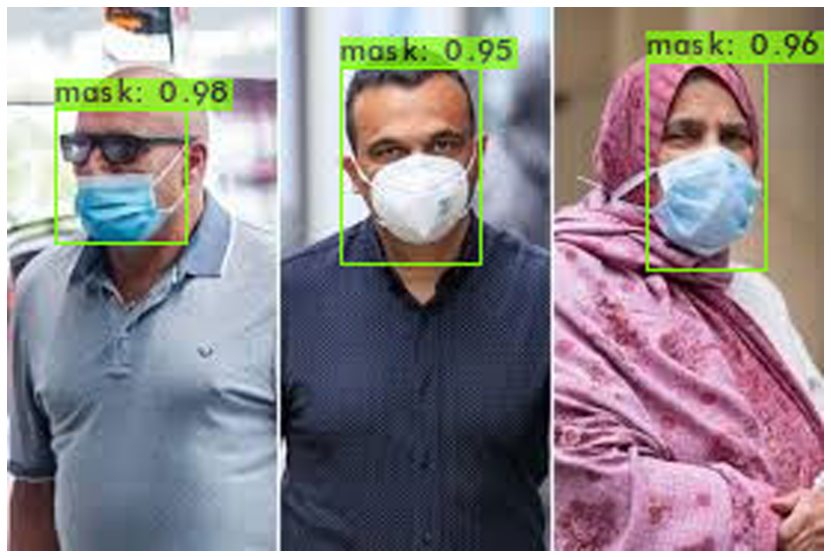

In [ ]:
imShow('predictions.jpg')

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg ./backup/yolov3_custom_last.weights /mydrive/yolov3/images19.jpg -thresh 0.3

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 